Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**NB. Do not add new or remove/cut cells in the notebook. Additionally, change the filename of this notebook to your_name-student_number.ipynb before submitting.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your student number below:

In [1]:
STUDENT_NUMBER = "141927"

---

# Exercises Lecture 1

## Exercise 1.1: Another ball dropped from a tower (2 points)

A ball is dropped from a tower of height $h$ with initial velocity zero.  Write a program that asks the user to enter the height in meters of the tower and then calculates and prints the time the ball takes until it hits the ground, ignoring air resistance.  Use your program to calculate the time for a ball dropped from a $100\,$m high tower.

In [2]:
def time_from_h(s):
    """calculates time taken for a mass dropped from height
    s to hit the ground
    Args:
        s (float): height in meters
    Returns:
        float: time to reach the ground"""
    # constants
    a = 9.8  # acceleration due to gravity (m/s^2)
    t = 0  # time (s)

    # YOUR CODE HERE
    dt = 0.0001  # time step (s)
    v = 0  # velocity (m/s)
    
    # iterate time steps until s = 0
    while s > 0:
        v += (-a) * dt  # update velocity downward
        s += v * dt  # update position
        t += dt  # update time passed
    # raise NotImplementedError()
    return t

In [3]:
# validation
assert time_from_h(0) == 0.0
assert abs(time_from_h(10) - 1.4285714) < 1e-4
print("Time for a ball dropped from 100m high tower: {} s"
      "".format(time_from_h(100)))

Time for a ball dropped from 100m high tower: 4.51750000000281 s


## Exercise 1.2: Quantum potential step (2 points)

A well-known quantum mechanics problem involves a particle of mass $m$ that encounters a one-dimensional potential step, like this:

<img src="qstep.png" width="500" />
<!-- ![Image](qstep.png) -->

The particle with initial kinetic energy $E$ and wavevector $k_1=\sqrt{2mE}/\hbar$ enters from the left and encounters a
sudden jump in potential energy of height $V$ at position $x=0$.  By solving the Schroedinger equation, one can show that when $E>V$ the particle may either (a) pass the step, in which case it has a lower kinetic energy of $E-V$ on the other side and a correspondingly smaller wavevector of $k_2=\sqrt{2m(E-V)}/\hbar$, or (b) it may be reflected, keeping all of
its kinetic energy and an unchanged wavevector but moving in the opposite direction.  The probabilities $T$ and $R$ for transmission and reflection are given by

$$T = {4k_1k_2\over(k_1+k_2)^2}\,,\qquad
R = \biggl( {k_1-k_2\over k_1+k_2} \biggr)^2.$$

Suppose we have a particle with mass equal to the electron mass $m=9.11\times10^{-31}\,$kg and energy $10\,$eV encountering a potential step of height $9\,$eV.  Write a Python program to compute and print out the transmission and reflection probabilities using the formulas above.

In [4]:
def get_tnr_prob(m, e, v):
    """get transmission and reflection probabilities
    Args:
        m (float): mass of the object in Kg
        e (float): energy of the object in eV
        v (float): height of the potential step in eV
    
    Retruns:
        float: transmission values
        float: reflection values
    """
    # constants
    hbar = 6.58211956e-16  # eVs 
    t, r = 0, 0
    
    # YOUR CODE HERE
    k1 = (2 * m * e)**0.5 / hbar  # initial wavevector
    k2 = (2 * m * (e - v))**0.5 / hbar  # wavevector after the step
    
    t = (4 * k1 * k2) / ((k1 + k2)**2)  # transmission probability
    r = ((k1 - k2) / (k1 + k2))**2  # reflection probability
    # raise NotImplementedError()
    return t, r

In [5]:
# validation
t, r = get_tnr_prob(8e-30, 20, 15)
assert abs(t - 0.88888888) < 1e-4, "bad transmission probability"
assert abs(r - 0.11111111) < 1e-4, "bad reflection probability"

# ex
m = 9.11e-31  # Kg
e = 10  # eV
v = 9  # eV
t, r = get_tnr_prob(m, e, v)
print("With: M {} Kg, E {} eV, and V {} eV\n"
      "Transmission probability: {}\n"
      "Reflection probability: {}".format(m, e, v, t, r))

With: M 9.11e-31 Kg, E 10 eV, and V 9 eV
Transmission probability: 0.7301261363877616
Reflection probability: 0.26987386361223836


## Exercise 1.3: Catalan numbers (2 points)

The Catalan numbers $C_n$ are a sequence of integers 1, 1, 2, 5, 14, 42, 132 $\dots$ that play an important role in quantum mechanics and the theory of disordered systems.  (They were central to Eugene Wigner's proof
of the so-called semicircle law.)  They are given by

$$
C_0 = 1,\qquad C_{n+1} = {4n+2\over n+2}\,C_n.
$$

Write a program that prints in increasing order all Catalan numbers less than or equal to one billion.

In [6]:
def get_catalan_nos():
    """ gets catalan numbers upto 1 billion
    Returns:
        list: list of catalan numbers upto 1 billion"""
    cat_nos = []
    
    # YOUR CODE HERE
    C = lambda n: (4*(n-1) + 2) / ((n-1) + 2) * cat_nos[n-1] if (n >= 1) else 1  # lambda function to get the n'th catalan number
    cat_nos.append(1)  # append C0 = 1
    n = 1  # start indexing at 1 (C0 has an index 0)
    
    while True:
        cat = int(C(n))  # get new cat number
        if cat >= 1e9:  # iterate as long as cat number is under 1 billion
            break
        cat_nos.append(cat)  # append to list
        n += 1
        
    for cat_n in cat_nos:
        print(cat_n, end=' ')  # print the cat numbers
    #raise NotImplementedError()
    
    return cat_nos

In [7]:
# validation
cat_nos = get_catalan_nos()
assert cat_nos[0] == 1
assert cat_nos[1] == 1
assert cat_nos[2] == 2
assert cat_nos[3] == 5
assert cat_nos[-1] <= 1e9

1 1 2 5 14 42 132 429 1430 4862 16796 58786 208012 742900 2674440 9694845 35357670 129644790 477638700 

## Exercise 1.4: The Madelung constant (2 points)

In condensed matter physics the Madelung constant gives the total electric potential felt by an atom in a solid.  It depends on the charges on the other atoms nearby and their locations.  Consider for instance solid sodium chloride---table salt.  The sodium chloride crystal has atoms arranged on a cubic lattice, but with alternating sodium and chlorine atoms, the sodium ones having a single positive charge $+e$ and the chlorine ones a single negative charge $-e$, where $e$ is the charge on the electron.  If we label each position on the lattice by three integer
coordinates $(i,j,k)$, then the sodium atoms fall at positions where $i+j+k$ is even, and the chlorine atoms at positions where $i+j+k$ is odd.

Consider a sodium atom at the origin, $i=j=k=0$, and let us calculate the Madelung constant.  If the spacing of atoms on the lattice is $a$, then the distance from the origin to the atom at position $(i,j,k)$ is

$$
\sqrt{(ia)^2 + (ja)^2 + (ka)^2} = a \sqrt{i^2+j^2+k^2},
$$

and the potential at the origin created by such an atom is

$$
V(i,j,k) = \pm {e\over4\pi\epsilon_0 a\sqrt{i^2+j^2+k^2}},
$$

with $\epsilon_0$ being the permittivity of the vacuum and the sign of the expression depending on whether $i+j+k$ is even or odd.  The total potential felt by the sodium atom is then the sum of this quantity over all other atoms.  Let us assume a cubic box around the sodium at the origin, with $L$ atoms in all directions.  Then

$$
V_\textrm{total} = \sum_{\substack{i,j,k=-L\\ \textrm{not }i=j=k=0}}^L
                   \hspace{-0.5em} V(i,j,k)
                 = {e\over4\pi\epsilon_0 a}\,M,
$$

where $M$ is the Madelung constant, at least approximately---technically the Madelung constant is the value of $M$ when $L\to\infty$, but one can get a good approximation just by using a large value of $L$.

Write a program to calculate and print the Madelung constant for sodium chloride.  Use as large a value of $L$ as you can, while still having your program run in reasonable time---say in a minute or less.

In [8]:
def get_madelung_constant(L):
    """gets madelung constant
    Args:
        L (int): number of atoms in all directions
    Returns:
        float: madelungs constant"""
    M = 0
    # YOUR CODE HERE
    # Equation: M = 1 / Sum (i,j,k = -L -> L) +/- [ sqrt(i^2 + j^2 + k^2) ]
    for i in range(-L, L+1):
        for j in range(-L, L+1):
            for k in range(-L, L+1):
                if i == 0 and j == 0 and k == 0:  # skip i = j = k = 0
                    continue
                if (i + j + k) % 2 == 0:
                    M += 1 / (i**2 + j**2 + k**2)**0.5  # even: sodium
                else:
                    M -= 1 / (i**2 + j**2 + k**2)**0.5  # odd: chlorine
    #raise NotImplementedError()
    return M

In [9]:
# validation
import time
t = time.time()
M = get_madelung_constant(200)
print("Run time: {} s\n"
      "Madelung constant: {}".format(time.time() - t, M))
assert abs(M + 1.747565) < 1e-2, "wrong value"

Run time: 98.90437960624695 s
Madelung constant: -1.7446850421707747


## Exercise 1.5: Recursion (3 points)

A useful feature of user-defined functions is *recursion*, the ability of a function to call itself.  For example, consider the following definition of the factorial $n!$ of a positive integer $n$:

$$
n! = \biggl\lbrace\begin{array}{ll}
  1 & \qquad\mbox{if $n=1$,} \\
  n\times(n-1)! & \qquad\mbox{if $n>1$.}
\end{array}
$$

This constitutes a complete definition of the factorial which allows us to calculate the value of $n!$ for any positive integer.  We can employ this definition directly to create a Python function for factorials, like this:

```
def factorial(n):
    if n==1:
        return 1
    else:
        return n*factorial(n-1)
```

Note how, if $n$ is not equal to 1, the function calls itself to calculate the factorial of $n-1$.  This is recursion.  If we now say `print(factorial(5))` the computer will correctly print the answer 120.

(a) We encountered the Catalan numbers $C_n$ previously in Exercise 1.3.  With just a little rearrangement, the definition given there can be rewritten in the form

$$
C_n = \left\lbrace\begin{array}{ll}
  \rule[-9pt]{0pt}{10pt}1 & \qquad\mbox{if $n=0$,} \\
  \dfrac{4n-2}{n+1}\,C_{n-1} & \qquad\mbox{if $n>0$.}
\end{array}\right.
$$

Write a Python function, using recursion, that calculates $C_n$.  Use your function to calculate and print $C_{100}$.

(b) Euclid showed that the greatest common divisor $g(m,n)$ of two nonnegative integers $m$ and $n$ satisfies

$$
g(m,n) = \biggl\lbrace\begin{array}{ll}
  m & \qquad\mbox{if $n=0$,} \\
  g(n,m\>\textrm{mod}\>n) & \qquad\mbox{if $n>0$.}
\end{array}
$$

Write a Python function `g(m,n)` that employs recursion to calculate the greatest common divisor of $m$ and $n$ using this formula.  Use your function to calculate and print the greatest common divisor of 108 and 192.

Comparing the calculation of the Catalan numbers in part (a) above with that of Exercise 1.3, we see that it's possible to do the calculation two ways, either directly or using recursion.  In most cases, if a quantity can
be calculated *without* recursion, then it will be faster to do so, and we normally recommend taking this route if possible.  There are some calculations, however, that are essentially impossible (or at least much
more difficult) without recursion.  We will see some examples later in this book.

In [10]:
def get_catalan_n(n):
    """ gets nth catalan number with recursion
    Args:
        n (int): the index of catalan number needed
    Returns:
        int: nth catalan number
    Raises:
        AssertionError: if n is not integer"""
    cn = 1
    assert isinstance(n, int), "n should be int"

    # YOUR CODE HERE
    C = lambda x: (4 * x - 2) / (x + 1) * C(x - 1) if (x > 0) else 1  # recursive function for C(n)
    cn = C(n)
    #raise NotImplementedError()
    return cn

In [11]:
# validation
# catalan numbers
c100 = get_catalan_n(100)
assert get_catalan_n(0) == 1, "bad get_catalan_n func"
assert get_catalan_n(1) == 1, "bad get_catalan_n func"
assert get_catalan_n(2) == 2, "bad get_catalan_n func"
assert get_catalan_n(20) == 6564120420, "bad get_catalan_n func"
print("100th catalan number = {}".format(c100))

100th catalan number = 8.965199470901317e+56


In [12]:
def get_gcd(m, n):
    """gets greatest common divisor of two non negative integers
    Args:
        m (int): first integer
        n (int): second integer
    Returns:
        int: greatest common divisor of m and n
    Raises:
        AssertionError: if m or n are not non negative integers"""
    gcd = 0
    
    # YOUR CODE HERE
    # special cases m = n, m = 0, n = 0
    if m == n:
        gcd = m
    elif m == 0:
        gcd = n
    elif n == 0:
        gcd = m
    else:
        m_divisors = []  # collect the divisors of m to a list
        n_divisors = []  # collect the divisors of n to a list
        limit = round(max(m, n) / 2) + 1  # upper limit for iteration
        for i in range(1, limit):  # iterate and find divisors until reached the midpoint of max(m, n)
            if m % i == 0:
                m_divisors.append(i)  # append divisors of m
            if n % i == 0:
                n_divisors.append(i)  # append divisors of n
        common_divisors = [value for value in m_divisors if value in n_divisors]  # get the union of the divisor lists
        gcd = max(common_divisors)  # gcd is the largest value in the list
    # raise NotImplementedError()
    
    return gcd

In [13]:
# gcd
assert get_gcd(2, 0) == 2, "bad get_gcd func"
assert get_gcd(2, 10) == 2, "bad get_gcd func"
assert get_gcd(12, 16) == 4, "bad get_gcd func"
print("gcd of {} and {} = {}".format(108, 192, get_gcd(108, 192)))

gcd of 108 and 192 = 12


## Exercise 1.6: Deterministic chaos and the Feigenbaum plot (2 points)

One of the most famous examples of the phenomenon of chaos is the *logistic map*, defined by the equation

$$
x' = rx(1-x).
$$

For a given value of the constant $r$ you take a value of $x$ --- say $x=\frac{1}{2}$ --- and you feed it into the right-hand side of this equation, which gives you a value of $x'$.  Then you take that value and feed it back in on the right-hand side again, which gives you another value, and so forth.  This is a *iterative map*.  You keep doing the same
operation over and over on your value of $x$, and one of three things happens: 

1. The value settles down to a fixed number and stays there.  This is called a *fixed point*.  For instance, $x=0$ is always a fixed point of the logistic map.  (You put $x=0$ on the right-hand side and you get $x'=0$ on the left.)

2. It doesn't settle down to a single value, but it settles down into a periodic pattern, rotating around a set of values, such as say four values, repeating them in sequence over and over.  This is called a *limit cycle*.

3. It goes crazy.  It generates a seemingly random sequence of numbers that appear to have no rhyme or reason to them at all.  This is *deterministic chaos*.  "Chaos" because it really does look chaotic, and "deterministic" because even though the values look random, they're not.  They're clearly entirely predictable, because they are given to you by one simple equation.  The behavior is *determined*, although it may not look like it.

Write a program that calculates and displays the behavior of the logistic map.  Here's what you need to do.  For a given value of $r$, start with $x=\frac{1}{2}$, and iterate the logistic map equation a thousand times.  That will give it a chance to settle down to a fixed point or limit cycle if it's going to.  Then run for another thousand iterations and plot the points $(r,x)$ on a graph where the horizontal axis is $r$ and the vertical axis is $x$.  You can either use the ``plot`` function with the options ``"ko"`` or ``"k."`` to draw a graph with dots, one for each point, you can use the ``scatter`` function to draw a scatter plot (which always uses dots).  Repeat the whole calculation for values of $r$ from 1 to 4 in steps of 0.01, plotting the dots for all values of $r$ on the same figure and then finally using the function ``show`` once to display the complete figure.

Your program should generate a distinctive plot that looks like a tree bent over onto its side.  This famous picture is called the *Feigenbaum plot*, after its discoverer Mitchell Feigenbaum, or sometimes the *figtree plot*, a play on the fact that it looks like a tree and Feigenbaum means "figtree" in German.

In [14]:
def logistic_map(r, x_init, n_settle, n_prod):
    """returns a list of values generated through the logistic map
    x' = r * x * (1 - x)
    Args:
        r (float): r value
        x_init (float): initial x value
        n_settle (int): number of values to make the map settle
        n_prod (int): number of values to include in the final map
    Returns:
        list: list of values generated through the logistic map"""
    map_values = []
    
    # YOUR CODE HERE
    x = x_init  # start with the given value
    for i in range(n_settle):  # iterate n_settle times to settle the value of x
        x = r * x * (1 - x)  # calculate new x
    for i in range(n_prod):  # iterate to produce n_prod new values for x
        x = r * x * (1 - x)  # calculate new x
        map_values.append(x)  # collect values for plotting
    #raise NotImplementedError()
    
    return map_values

In [15]:
# validation
import numpy as np
l_map = logistic_map(2, 0.5, 1000, 1000)
assert np.all([abs(x - 0.5) < 1e-4 for x in l_map]) == True, "bad function"
assert len(l_map) == 1000, "len mismatch"

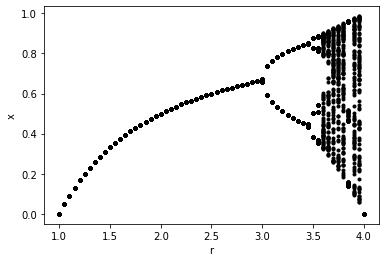

In [17]:
# plotting
from matplotlib import pyplot as plt
r = [x / 20 for x in range(20, 101)]  # 1, 1.05, 1.10, 1.15 ... 5

# YOUR CODE HERE
for i in range(len(r)):  # calculate for every value of r
    l_map = logistic_map(r[i], 0.5, 1000, 100)  # for every r, get a list of values x
    for j in range(len(l_map)):
        plt.plot(r[i], l_map[j], 'k.')  # plot every x with the corresponding value of r
    
#raise NotImplementedError()
plt.xlabel('r')
plt.ylabel('x')
plt.show()

Give answers to the following questions:

(a) For a given value of $r$ what would a fixed point look like on the Feigenbaum plot?  How about a limit cycle?  And what would chaos look like?

(b) Based on your plot, at what value of $r$ does the system move from orderly behavior (fixed points or limit cycles) to chaotic behavior? This point is sometimes called the "edge of chaos."

The logistic map is a very simple mathematical system, but deterministic chaos is seen in many more complex physical systems also, including especially fluid dynamics and the weather.  Because of its apparently random nature, the behavior of chaotic systems is difficult to predict and strongly affected by small perturbations in outside conditions.  You've probably heard of the classic exemplar of chaos in weather systems, the *butterfly effect*, which was popularized by physicist Edward Lorenz in 1972 when he gave a lecture to the American Association for the
Advancement of Science entitled, "Does the flap of a butterfly's wings in Brazil set off a tornado in Texas?"  (Although arguably the first person to suggest the butterfly effect was not a physicist at all, but the science
fiction writer Ray Bradbury in his famous 1952 short story *A Sound of Thunder*, in which a time traveler's careless destruction of a butterfly during a tourist trip to the Jurassic era changes the course of history.)

**Comment:** There is another approach for computing the Feigenbaum plot, which is neater and faster, making use of Python's ability to perform arithmetic with entire arrays.  You could create an array ``r`` with one element containing each distinct value of $r$ you want to investigate: ``[1.0, 1.01, 1.02, ... ]``.  Then create another
array ``x`` of the same size to hold the corresponding values of $x$, which should all be initially set to $0.5$.  Then an iteration of the logistic map can be performed for all values of $r$ at once with a statement of the form ``x = r*x*(1-x)``.  Because of the speed with which Python can perform calculations on arrays, this method should be
significantly faster than the more basic method above.

### Explanation (double click)

(a) Values of x are fixed to a point for all r lower than 3. A limit cycle can be seen, e.g., for value of r between 3 and 3.5, where x cycles between two values. From r values higher than 3.6, x behaves chaotically, except for some small areas of order.

(b) Around 3.6.

## Exercise 1.7: Least-squares fitting and the photoelectric effect (3 points)

It's a common situation in physics that an experiment produces data that lies roughly on a straight line, like the dots in this figure:

<img src="leastsq.png" width="500" />

The solid line here represents the underlying straight-line form, which we usually don't know, and the points representing the measured data lie roughly along the line but don't fall exactly on it, typically because of measurement error.

The straight line can be represented in the familiar form $y=mx+c$ and a frequent question is what the appropriate values of the slope $m$ and intercept $c$ are that correspond to the measured data.  Since the data don't fall perfectly on a straight line, there is no perfect answer to such a question, but we can find the straight line that gives the best compromise fit to the data.  The standard technique for doing this is the *method of least squares*.

Suppose we make some guess about the parameters $m$ and $c$ for the straight line.  We then calculate the vertical distances between the data points and that line, as represented by the short vertical lines in the figure, then we calculate the sum of the squares of those distances, which we denote $\chi^2$.  If we have $N$ data points with coordinates $(x_i,y_i)$, then $\chi^2$ is given by

$$
\chi^2 = \sum_{i=1}^N (mx_i+c-y_i)^2.
$$

The least-squares fit of the straight line to the data is the straight line that minimizes this total squared distance from data to line.  We find the minimum by differentiating with respect to both $m$ and $c$ and setting the derivatives to zero, which gives

\begin{align*}
m \sum_{i=1}^N x_i^2 + c \sum_{i=1}^N x_i - \sum_{i=1}^N x_iy_i &= 0, \\
m \sum_{i=1}^N x_i + cN - \sum_{i=1}^N y_i &= 0.
\end{align*}

For convenience, let us define the following quantities:
$$
E_x = {1\over N} \sum_{i=1}^N x_i,\qquad
E_y = {1\over N} \sum_{i=1}^N y_i,\qquad
E_{xx} = {1\over N} \sum_{i=1}^N x_i^2,\qquad
E_{xy} = {1\over N} \sum_{i=1}^N x_iy_i,
$$
in terms of which our equations can be written
\begin{align*}
mE_{xx} + cE_x &= E_{xy}\,, \\
mE_x + c &= E_y\,.
\end{align*}

Solving these equations simultaneously for $m$ and $c$ now gives

\begin{equation}
m = {E_{xy}-E_x E_y\over E_{xx} - E_x^2},\qquad
c = {E_{xx}E_y-E_x E_{xy}\over E_{xx} - E_x^2}.
\end{equation}

These are the equations for the least-squares fit of a straight line to $N$ data points.  They tell you the values of $m$ and $c$ for the line that best fits the given data.

(a) In the folder that you obtained this notebook you will find a file called ``millikan.txt``.  The file contains two columns of numbers, giving the $x$ and $y$ coordinates of a set of data points.  Write a program to read these data points and make a graph with one dot or circle for each point.

(b) Add code to your program, before the part that makes the graph, to calculate the quantities $E_x$, $E_y$, $E_{xx}$, and $E_{xy}$ defined above, and from them calculate and print out the slope $m$ and intercept $c$ of the best-fit line.

(c) Now write code that goes through each of the data points in turn and evaluates the quantity $mx_i+c$ using the values of $m$ and $c$ that you calculated.  Store these values in a new array or list, and then graph this new array, as a solid line, on the same plot as the original data. You should end up with a plot of the data points plus a straight line that runs through them.

(d) The data in the file ``millikan.txt`` are taken from a historic experiment by Robert Millikan that measured the *photoelectric effect*.  When light of an appropriate wavelength is shone on the surface of a metal, the photons in the light can strike conduction electrons in the metal and, sometimes, eject them from the surface into the free space above.  The energy of an ejected electron is equal to the energy of the photon that struck it minus a small amount $\phi$ called the *work function* of the surface, which represents the energy needed to remove an electron from the surface.  The energy of a photon is $h\nu$, where $h$ is Planck's constant and $\nu$ is the frequency of the light, and we can measure the energy of an ejected electron by measuring the voltage $V$ that is just sufficient to stop the electron moving.  Then the voltage, frequency, and work function are related by the equation

\begin{equation}
V = {h\over e}\nu - \phi,
\end{equation}

where $e$ is the charge on the electron.  This equation was first given by Albert Einstein in 1905.

The data in the file ``millikan.txt`` represent frequencies $\nu$ in hertz (first column) and voltages $V$ in volts (second column) from photoelectric measurements of this kind.  Using the equation above and the program you wrote, and given that the charge on the electron is $1.602\times10^{-19}\,$C, calculate from Millikan's experimental data a value for Planck's constant.  Compare your value with the accepted value of the constant, which you can find in books or on-line.  You should get a result within a couple of percent of the accepted value.

This calculation is essentially the same as the one that Millikan himself used to determine of the value of Planck's constant, although, lacking a computer, he fitted his straight line to the data by eye.  In part for this work, Millikan was awarded the Nobel prize in physics in 1923.

In [76]:
# data fitting 
def fit(x, y):
    """Fits straight line to the data
    Args:
        x (list): list of x values
        y (list): list of y values
    Returns
        float: m slope of the line fit
        float: c constant of the line fit"""
    m, c = 0, 0
    
    # YOUR CODE HERE
    #x_millikan = []
    #y_millikan = []
    #with open("millikan.txt", "r") as file:  # read file
    #    for line in file.readlines():
    #        row = line.split(' ')  # split lines by whitespace
    #        x_millikan.append(float(row[0]))  # read x
    #        y_millikan.append(float(row[1]))  # and y values
    #x = x_millikan
    #y = y_millikan

    N = len(x)  # number of data points
    # calculate the quantities Ex, Ey, Exx, and Exy
    Ex = Ey = Exx = Exy = 0  # initialize all quantities as zero
    for i in range(N):
            Ex += x[i]
            Ey += y[i]
            Exx += x[i] * x[i]
            Exy += x[i] * y[i]
            
    # divide all quantities by N
    Ex /= N
    Ey /= N
    Exx /= N
    Exy /= N
    
    # calculate the slope m and intercept c
    m = (Exy - Ex * Ey) / (Exx - Ex * Ex)
    c = (Exx * Ey - Ex * Exy) / (Exx - Ex * Ex)
    
    print("The slope m is:", m)
    print("The intercept c is:", c)
    
    # calculate the best fit line data points, ŷ = mx + c
    y_hat = []
    for i in range(N):
        y_hat.append(m * x[i] + c)
    
    plt.plot(y, x, 'ko')  # data points
    plt.plot(y_hat, x, 'r-')  # best fit line
    plt.show()
    #raise NotImplementedError()
    
    return m, c

The slope m is: 1.0
The intercept c is: 0.0


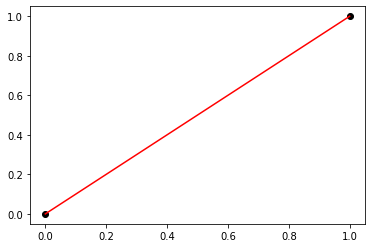

In [77]:
# validation
m, c = fit([0, 1], [0, 1])
assert m == 1, "bad fit"
assert c == 0, "bad fit"

In [79]:
def get_plank_const(filename):
    """returns planks constant from millikan experiment
    Args:
        filename (str): name of file with millikan data
    Returns:
        float: plank's constant"""
    # constants
    m = 0 # slope of fit, h/e
    c = 0 # fitting constant, \phi, work funtion
    e = 1.602e-19 # charge on electron

    # YOUR CODE HERE
    x = []
    y = []
    with open(filename, "r") as file:  # read the file
        for line in file.readlines():
            row = line.split(' ')  # split lines by whitespace
            x.append(float(row[0]))  # read x
            y.append(float(row[1]))  # and y values
            
    m, c = fit(x, y)

    # calculate the Planck's constant
    #h = m * e  # m2 kg / s
    #h_real = 6.626068e-34  # m2 kg / s
    #print("Planck's constant:", h)
    #print("Literature value:", h_real)
    #print("Error: {:.2f}%".format(abs(h_real - h) / h_real * 100))
    #raise NotImplementedError()

    return m * e

The slope m is: 4.088227358517516e-15
The intercept c is: -1.7312358039813558


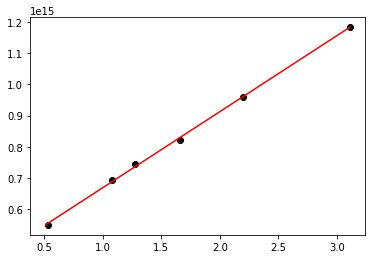

plank's constant calculated = 6.549340228345061e-34 m^2Kg/s
plank's constant = 6.626068e-34 m^2Kg/s


In [80]:
h = get_plank_const('millikan.txt')
print("plank's constant calculated = {} m^2Kg/s\n"
      "plank's constant = 6.626068e-34 m^2Kg/s".format(h))
assert abs(h - 6.626068e-34) < 1e-35, "error too large"

## Exercise 1.8 (2 points)

Write a program to calculate and print the factorial of a number entered by the user. Write your program so that it calculates the factorial using *integer* variables, not floating-point ones.  Use your program to calculate the factorial of 200.

Now modify your program to use floating-point variables instead and again calculate the factorial of 200.  What do you find?  Explain.

In [105]:
def factorial_int(n):
    """factorial of a number with integer variables
    Args:
        n (int): number to calculate factorial of
    Returns:
        int: the factorial of n"""    
    # YOUR CODE HERE
    factorial = lambda n: int(n) * factorial(int(n) - 1) if n > 1 else 1
    fact_n = int(factorial(n))
    #raise NotImplementedError()
    return fact_n

def factorial_float(n):
    """factorial of a number with floating variables
    Args:
        n (float): number to calculate factorial of
    Returns:
        int: the factorial of n"""
    # YOUR CODE HERE
    factorial = lambda n: float(n) * factorial(float(n) - 1) if n > 1 else 1
    fact_n = float(factorial(n))
    #raise NotImplementedError()
    return fact_n

In [106]:
# validation
print("Factorial of {}\nWith int variables: {}\nWith float variables: {}"
      "".format(200, factorial_int(200), factorial_float(200)))
assert factorial_float(4) == 24
assert factorial_int(4) == 24
assert isinstance(factorial_int(0), int)
assert isinstance(factorial_float(0), float)

Factorial of 200
With int variables: 788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000
With float variables: inf


### Explanation (double click to edit)

Factorial with int values is a very large number, but the same with floats goes to infinity. This is probably because in floating point arithmetic there is some small errors in very low decimal places, which build up in multiplication to produce a too high value.

## Exercise 1.9: Calculating integrals (2 points)

Suppose we want to calculate the value of the integral

\begin{equation}
I = \int_{-1}^1 \sqrt{1-x^2} \>d x.
\end{equation}

The integrand looks like a semicircle of radius 1:

<img src="semicircle.png" width="500" />

and hence the value of the integral---the area under the curve---must be $\frac{1}{2}\pi=1.57079632679\ldots$

Alternatively, we can evaluate the integral on the computer by dividing the domain of integration into a large number $N$ of slices of width $h=2/N$ each and then using the Riemann definition of the integral:

\begin{equation}
I = \lim_{N\to\infty} \sum_{k=1}^N hy_k\,,
\end{equation}

where

\begin{equation}
y_k = \sqrt{1 - x_k^2}\qquad\mbox{and}\qquad
x_k = -1 + hk.
\end{equation}

We cannot in practice take the limit $N\to\infty$, but we can make a reasonable approximation by just making $N$ large.

(a) Write a program to evaluate the integral above with $N=100$ and compare the result with the exact value.  The two will not agree very well, because $N=100$ is not a sufficiently large number of slices.

(b) Increase the value of $N$ to get a more accurate value for the integral.  If we require that the program runs in about one second or less, how accurate a value can you get?

Evaluating integrals is a common task in computational physics calculations.  We will study techniques for doing integrals in detail in the next chapter.  As we will see, there are substantially quicker and more accurate methods than the simple one we have used here.

In [111]:
def semicircle_area(N=100):
    """Calculates the area of a semi circle with unit radius using
    the riemann definition of an integral
    Args:
        N (int): number of slices to compute area
    Retruns:
        float: area of the semi circle"""
    N = 100
    area = 0

    # YOUR CODE HERE
    h = 2/N
    area = 0
    for k in range(1, N+1):
        xk = -1 + h*k
        yk = (1 - xk**2)**0.5
        area += h * yk
    #raise NotImplementedError()
    
    return area

In [112]:
# validation
N = 1000

import time
t = time.time()
area = semicircle_area(N)
print("Runtime = {} s\nArea with N {} = {} sq.m.\n"
      "Error = {} %".format((time.time() - t), N, area,
                               abs(area / 1.57079632679 - 1) * 100))

assert abs(area - 1.57079632679) < 1e-2, "error too large"

Runtime = 0.00016355514526367188 s
Area with N 1000 = 1.5691342555492505 sq.m.
Error = 0.10581074149480507 %


### Explanation (double click to edit)

YOUR ANSWER HERE